In [13]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20


# Question set # 1

data.sf_temps()

Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
df = data.sf_temps()

In [5]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [9]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [17]:
daily_avg = df.resample('D').mean()
daily_avg

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

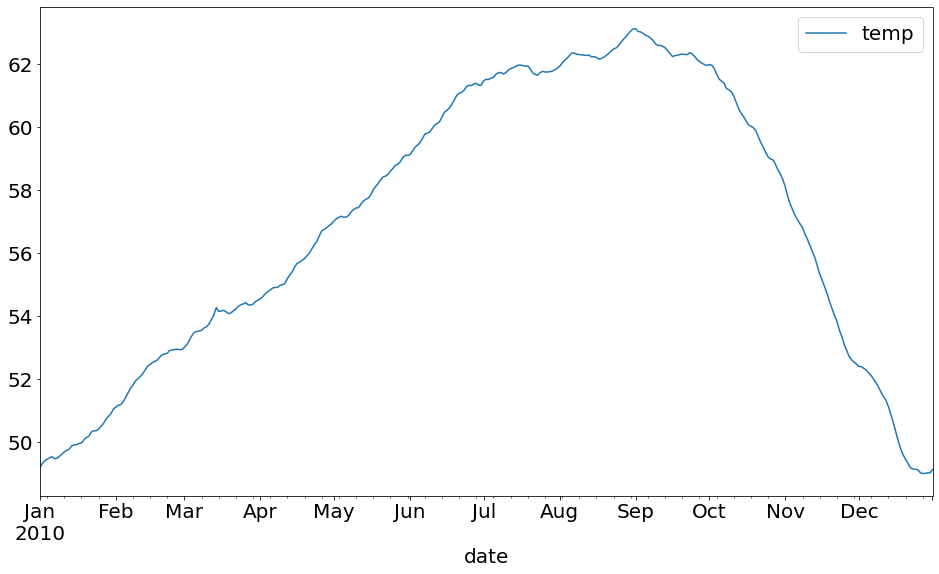

In [18]:
daily_avg.plot()

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

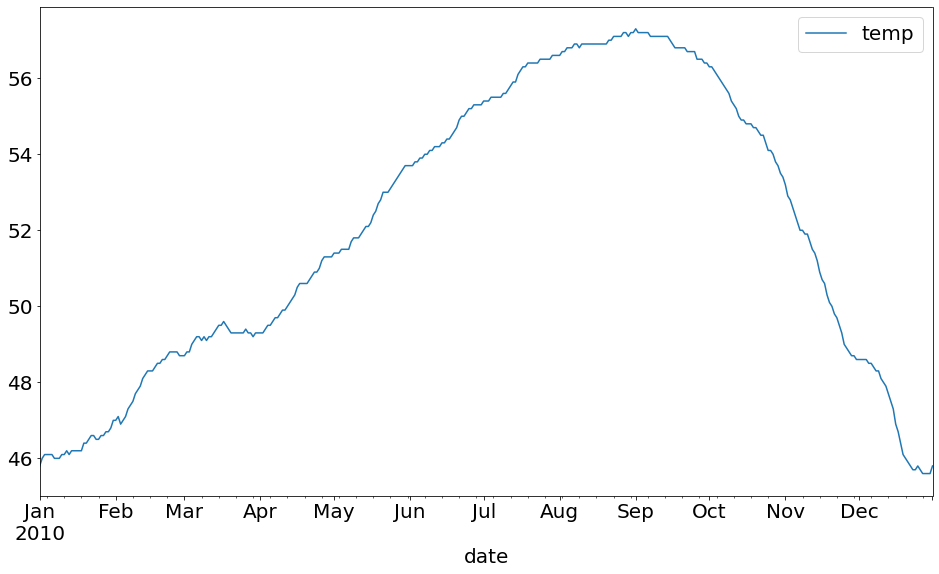

In [19]:
daily_min = df.resample('D').min()
daily_min.plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

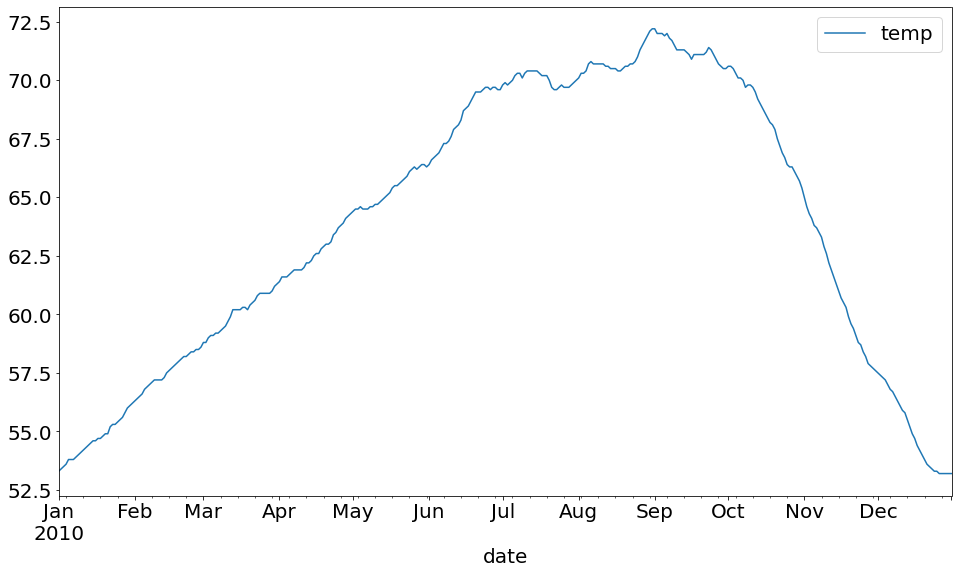

In [20]:
daily_max = df.resample('D').max()
daily_max.plot()

4. Which month is the coldest, on average?

In [32]:
# Option 1
df.resample('M').mean().sort_values('temp')

,temp,month
date,,
2010-01-31,49.984140,1.0
2010-12-31,50.498253,12.0
2010-02-28,52.243899,2.0
2010-03-31,53.956528,3.0
2010-11-30,55.185139,11.0
2010-04-30,55.633056,4.0
2010-05-31,57.970968,5.0
2010-10-31,60.253091,10.0
2010-06-30,60.444722,6.0


In [33]:
# Option 2
df['month'] = df.index.month
df.groupby('month').mean().sort_values('temp')

,temp
month,
1,49.984140
12,50.498253
2,52.243899
3,53.956528
11,55.185139
4,55.633056
5,57.970968
10,60.253091
6,60.444722


January is the coldest month

5. Which month has the highest average temperature?

Looking at the data from the previous couple of cells, it seems September has the highest average temperature.

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [39]:
daily_range = pd.DataFrame(daily_max.temp - daily_min.temp)
daily_range

,temp
date,
2010-01-01,7.5
2010-01-02,7.4
2010-01-03,7.4
2010-01-04,7.5
2010-01-05,7.7
...,...
2010-12-27,7.6
2010-12-28,7.6
2010-12-29,7.6


In [40]:
daily_range.sort_values('temp')

,temp
date,
2010-01-02,7.4
2010-01-03,7.4
2010-12-31,7.4
2010-12-26,7.5
2010-12-25,7.5
...,...
2010-09-03,14.8
2010-08-29,14.8
2010-08-30,14.9


In [316]:
daily_range.resample('M').max().sort_values('temp')

,temp
date,
2010-12-31,8.9
2010-01-31,9.3
2010-02-28,9.9
2010-11-30,11.8
2010-03-31,12.0
2010-04-30,13.0
2010-05-31,13.1
2010-10-31,14.4
2010-06-30,14.8


The month with the highest range of daily variability on average is August.

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

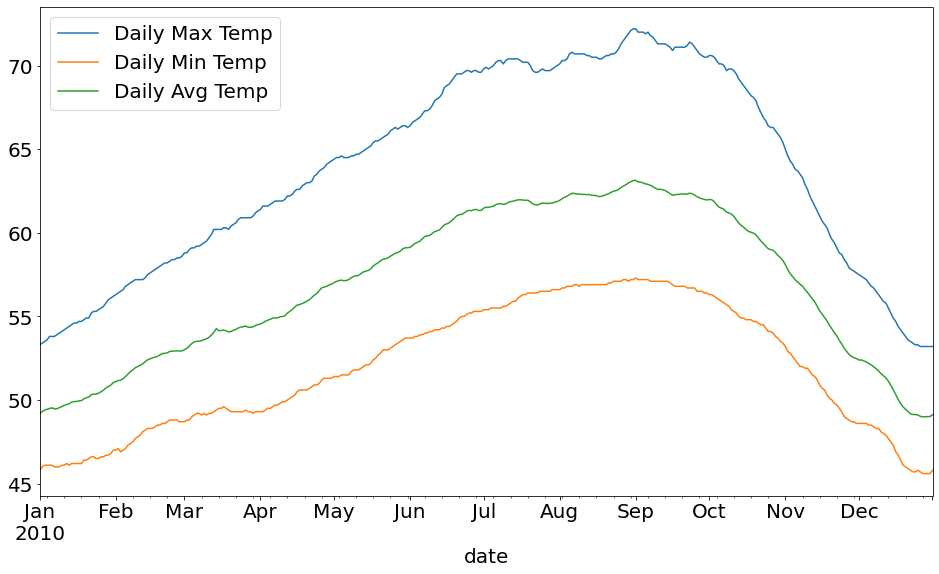

In [49]:
daily_max.temp.plot(label = 'Daily Max Temp')
daily_min.temp.plot(label = 'Daily Min Temp')
daily_avg.temp.plot(label = 'Daily Avg Temp')
plt.legend()
plt.show()

# Question set #2

data.seattle_weather()

Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?

In [58]:
from vega_datasets import data
df = data.seattle_weather()

In [59]:
pd.to_datetime(df.date)

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [60]:
df = df.set_index('date').sort_values('date')
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [74]:
df.resample('M').sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

December 2015 had the highest precipitation 

2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

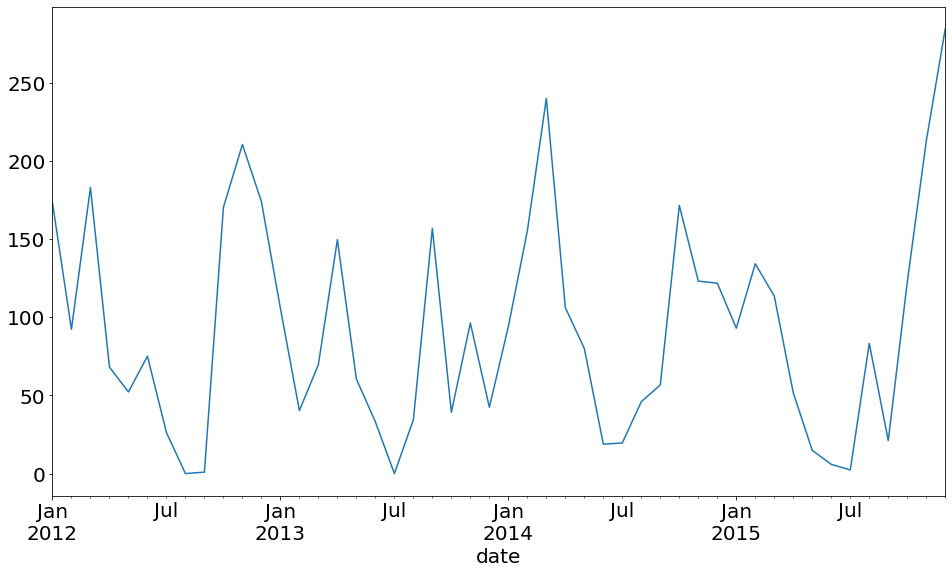

In [76]:
df.resample('M').sum().precipitation.plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Text(0.5, 1.0, 'Total wind in 2 Week segments')

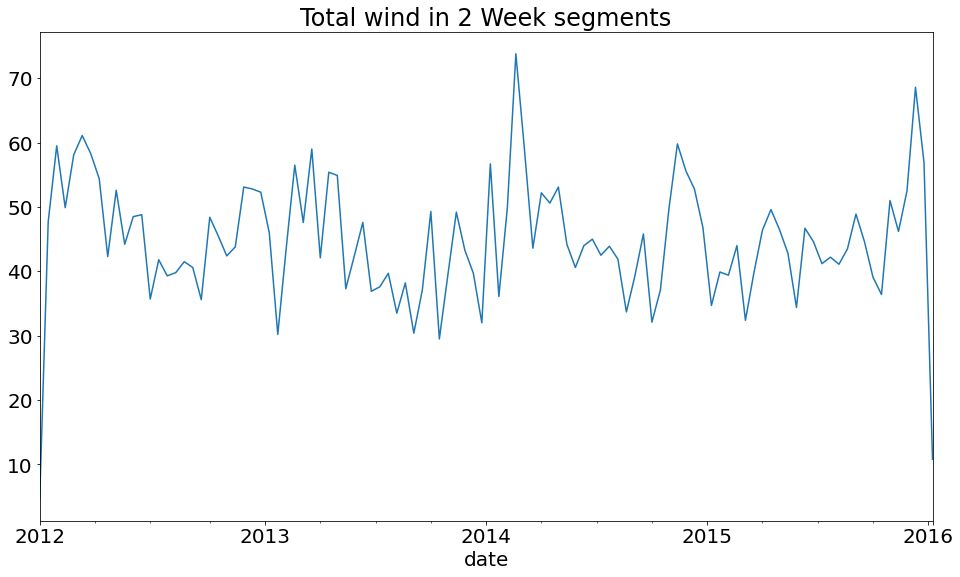

In [90]:
df.resample('2W').sum().wind.plot()
plt.title("Total wind in 2 Week segments")

4. Which year-month combination is the windiest?

In [93]:
df.resample('M').sum().wind.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

December 2015 was the month with the highest total wind.

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [101]:
sunny_days = df[df.weather == 'sun']

In [106]:
# Option 1
sunny_days.resample('Y').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


In [112]:
# Option 2
sunny_days.index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64

As seen above, 2014 had the most days with sunny weather.

6. In which month does it rain the most?

In [126]:
df['month'] = df.index.month

In [134]:
df.groupby('month').mean().precipitation.sort_values(), df.groupby('month').sum().precipitation.sort_values()

(month
 7     0.388710
 6     1.107500
 8     1.320161
 5     1.673387
 9     1.962500
 4     3.128333
 2     3.734513
 1     3.758065
 10    4.059677
 3     4.888710
 12    5.021774
 11    5.354167
 Name: precipitation, dtype: float64,
 month
 7      48.2
 6     132.9
 8     163.7
 5     207.5
 9     235.5
 4     375.4
 2     422.0
 1     466.0
 10    503.4
 3     606.2
 12    622.7
 11    642.5
 Name: precipitation, dtype: float64)

November is the month with both the highest avg and highest total precipitation.

7. Which month has the most number of days with a non-zero amount of precipitation?

In [139]:
day_with_rain = df[df.precipitation > 0]
day_with_rain.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1
2012-01-06,2.5,4.4,2.2,2.2,rain,1


In [150]:
day_with_rain.resample('M').count().precipitation.sort_values(ascending=False).head()

date
2012-12-31    27
2015-12-31    25
2012-01-31    22
2012-03-31    22
2015-11-30    20
Name: precipitation, dtype: int64

December 2012 had the most days witha non-zero amount of precipitation.

# Question set #3

data.flights_20k()

1. Convert any negative delays to 0.

In [165]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [170]:
df = df.set_index('date')

In [171]:
def delay_conv(df):
    if df['delay'] < 0:
        return 0
    else:
        return df['delay']

In [172]:
df['delay'] = df.apply(delay_conv, axis = 1)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


2. Which hour of the day has the highest average delay?

In [178]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [181]:
df.groupby('hour').delay.mean().sort_values(ascending=False)

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
21     21.626768
20     17.889778
19     16.256557
18     14.514218
16     13.881068
17     13.199580
15     13.137592
13     11.453311
14     10.747320
12      9.214341
11      7.361495
10      5.850953
9       5.002504
8       4.030483
7       3.071932
6       2.494856
5       0.513514
Name: delay, dtype: float64

It looks like 3 in the morning has the highest average delay. You can see why in the cell below.

In [182]:
df[df.hour == 3]

,delay,distance,origin,destination,hour
date,,,,,
2001-01-02 03:20:00,245,405,MCI,MDW,3
2001-02-23 03:25:00,360,239,DAL,HOU,3


3. Does the day of the week make a difference in the delay amount?

In [184]:
df['day_of_the_week'] = df.index.day_of_week
df.head()

,delay,distance,origin,destination,hour,day_of_the_week
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,5
2001-01-31 16:40:00,0,1093,FLL,ISP,16,2
2001-02-11 18:39:00,3,293,LBB,DAL,18,6
2001-01-10 21:00:00,0,550,MSY,MCO,21,2
2001-03-30 21:45:00,0,229,STL,IND,21,4


In [185]:
df.groupby('day_of_the_week').delay.mean()

day_of_the_week
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

Yes it does look like the day of the week makes a difference in the delay amount; Fridays seem to have the most with almost a delay of 5 minutes more than the next  closest day.

4. Does the month make a difference in the delay amount?

In [186]:
df['month'] = df.index.month
df.head()

,delay,distance,origin,destination,hour,day_of_the_week,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,5,1
2001-01-31 16:40:00,0,1093,FLL,ISP,16,2,1
2001-02-11 18:39:00,3,293,LBB,DAL,18,6,2
2001-01-10 21:00:00,0,550,MSY,MCO,21,2,1
2001-03-30 21:45:00,0,229,STL,IND,21,4,3


In [187]:
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

It does look like month has some affect on delay amount but not as much as day. 

# Bonus set #1

from vega_datasets import data

data.iowa_electricity()
1. For each row, calculate the percentage of the year's total that energy source provided.


In [205]:
df = data.iowa_electricity()
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [212]:
df = df.set_index('year')
df.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2002-01-01,Fossil Fuels,35991
2003-01-01,Fossil Fuels,36234
2004-01-01,Fossil Fuels,36205
2005-01-01,Fossil Fuels,36883


In [224]:
df

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2002-01-01,Fossil Fuels,35991
2003-01-01,Fossil Fuels,36234
2004-01-01,Fossil Fuels,36205
2005-01-01,Fossil Fuels,36883
2006-01-01,Fossil Fuels,37014
2007-01-01,Fossil Fuels,41389
2008-01-01,Fossil Fuels,42734
2009-01-01,Fossil Fuels,38620


2. Lineplot of generation over time, color by source


3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)


4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?


5. Is the total generation increasing over time?


6. How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total